In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-fatigue-with-fss/sleep - Form responses 1.csv
/kaggle/input/sleep-survey/sleep - Form responses 1.csv


In [2]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [3]:
df = pd.read_csv('/kaggle/input/sleep-fatigue-with-fss/sleep - Form responses 1.csv')

In [4]:
df

,Timestamp,What Year of Study are you in?,Gender,"On average, how many hours do you sleep per night during a typical week? [Numbers Only]",How consistent is your sleep schedule during the week?,Do you take naps during the day?,How long can you concentrate in a single sitting?\n(answer in minutes),How many hours do you spend studying or doing academic work each day?(numbers only hours),How many caffeinated beverages do you generally drink during the day? (0 for none)\n(Numbers only),My motivation is lower when I am fatigued.,Exercise brings on my fatigue.,I am easily fatigued.,Fatigue interferes with my physical functioning.,Fatigue causes frequent problems for me.,My fatigue prevents sustained physical functioning.,Fatigue interferes with carrying out certain duties and responsibilities.,Fatigue is among my three most disabling symptoms.,"Fatigue interferes with my work, family, or social life.",Email address
0,14/12/2024 00:59:19,2nd Year,Male,5.5,5 times a week,Yes,60,2.0,1.0,4,5,2,5,1,1,4,3,3,diptanshukumar9471@gmail.com
1,14/12/2024 06:48:10,2nd Year,Male,6.0,All days,Yes,45,3.0,3.0,7,1,5,1,2,2,2,2,6,saini.krishna0810@gmail.com
2,14/12/2024 10:07:15,2nd Year,Male,5.0,Once a week,No,30,1.0,0.0,7,3,4,6,6,5,6,4,5,pavang.ec23@rvce.edu.in
3,14/12/2024 10:45:05,2nd Year,Male,6.0,Twice a week,No,40,4.5,0.0,5,5,2,2,2,4,2,5,5,suryanarayan252005@gmail.com
4,14/12/2024 11:40:55,2nd Year,Male,6.0,All days,Yes,120,4.0,2.0,7,3,3,7,4,4,5,4,5,panjwanimanas90@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,04/01/2025 13:15:50,4th Year,Male,7.0,Thrice a week,Yes,30,4.0,3.0,4,6,7,5,4,4,6,4,5,ashfaqpatel852@gmail.com
147,04/01/2025 13:16:35,1st Year,Male,7.0,5 times a week,Yes,1,2.0,0.0,6,2,4,3,5,4,3,2,5,izhaanmomin1506@gmail.com
148,04/01/2025 13:25:46,2nd Year,Male,8.0,All days,No,20,5.0,12.0,4,1,1,1,4,4,2,6,7,abuqais7676@gmail.com
149,04/01/2025 13:25:56,2nd Year,Male,7.0,5 times a week,Yes,50,8.0,3.0,4,6,5,7,6,4,7,1,6,mustaqpatel406@gmail.com


In [5]:
df.columns

Index(['Timestamp', 'What Year of Study are you in?', 'Gender',
       'On average, how many hours do you sleep per night during a typical week? [Numbers Only]',
       'How consistent is your sleep schedule during the week?',
       'Do you take naps during the day?',
       'How long can you concentrate in a single sitting?\n(answer in minutes)',
       'How many hours do you spend studying or doing academic work each day?(numbers only hours)',
       'How many caffeinated beverages do you generally drink during the day? (0 for none)\n(Numbers only)',
       ' My motivation is lower when I am fatigued.',
       'Exercise brings on my fatigue.', 'I am easily fatigued.',
       ' Fatigue interferes with my physical functioning.',
       'Fatigue causes frequent problems for me.',
       'My fatigue prevents sustained physical functioning.',
       'Fatigue interferes with carrying out certain duties and responsibilities.',
       'Fatigue is among my three most disabling symptoms.',
  

In [6]:
import matplotlib.pyplot as plt

In [7]:
df.columns = [
    'timestamp',
    'year_of_study',
    'gender',
    'avg_sleep_hours',
    'sleep_schedule_consistency',
    'daytime_naps',
    'concentration_duration',
    'daily_study_hours',
    'daily_caffeine_intake',
    'low_motivation_when_fatigued',
    'exercise_causes_fatigue',
    'easily_fatigued',
    'fatigue_interferes_physical_function',
    'fatigue_frequent_problems',
    'fatigue_prevents_physical_function',
    'fatigue_interferes_duties',
    'fatigue_top_disabling_symptom',
    'fatigue_interferes_life',
    'email'
]


In [8]:
df['year_of_study'].value_counts()

year_of_study
2nd Year    89
1st Year    35
4th Year    14
3rd Year    13
Name: count, dtype: int64

In [9]:
list(df['year_of_study'].value_counts())

[89, 35, 14, 13]

<BarContainer object of 4 artists>

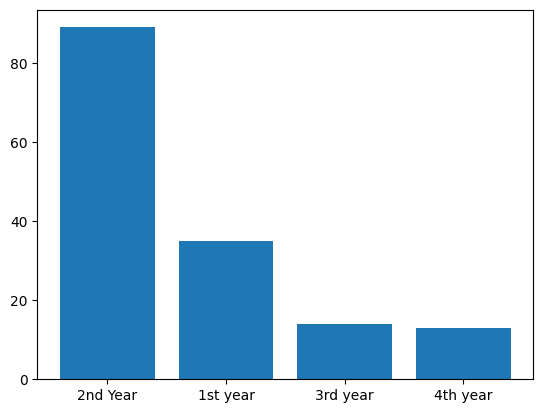

In [10]:
plt.bar(["2nd Year", "1st year","3rd year","4th year"],list(df['year_of_study'].value_counts()))

**Distribution of responses across the years**

In [11]:
df['gender'].value_counts()

gender
Male                        110
Female                       37
Prefer not to say/ Other      4
Name: count, dtype: int64

<BarContainer object of 3 artists>

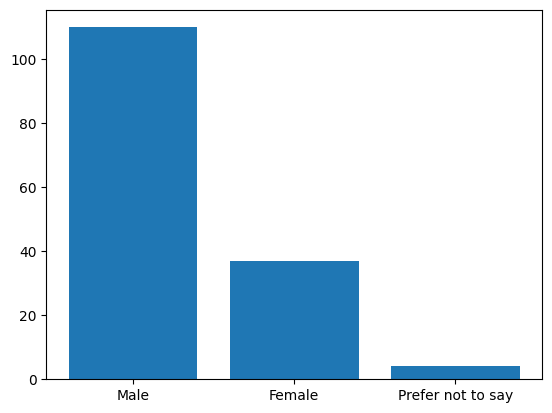

In [12]:
plt.bar(['Male','Female','Prefer not to say'],list(df['gender'].value_counts()))

In [13]:
df.columns

Index(['timestamp', 'year_of_study', 'gender', 'avg_sleep_hours',
       'sleep_schedule_consistency', 'daytime_naps', 'concentration_duration',
       'daily_study_hours', 'daily_caffeine_intake',
       'low_motivation_when_fatigued', 'exercise_causes_fatigue',
       'easily_fatigued', 'fatigue_interferes_physical_function',
       'fatigue_frequent_problems', 'fatigue_prevents_physical_function',
       'fatigue_interferes_duties', 'fatigue_top_disabling_symptom',
       'fatigue_interferes_life', 'email'],
      dtype='object')

In [14]:
df['daytime_naps'].value_counts()

daytime_naps
Yes    77
No     74
Name: count, dtype: int64

<BarContainer object of 2 artists>

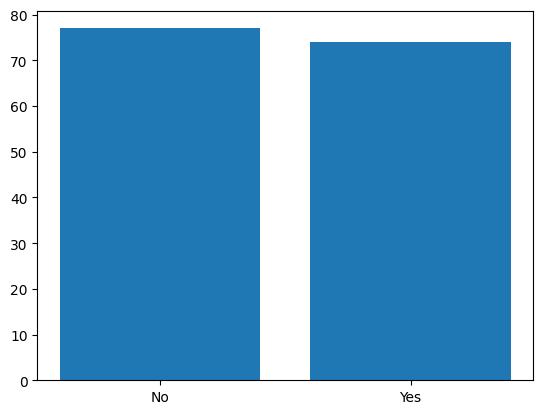

In [15]:
plt.bar(['No','Yes'],list(df['daytime_naps'].value_counts()))

**DayTime naps**

In [16]:
fss = ['low_motivation_when_fatigued', 'exercise_causes_fatigue',
       'easily_fatigued', 'fatigue_interferes_physical_function',
       'fatigue_frequent_problems', 'fatigue_prevents_physical_function',
       'fatigue_interferes_duties', 'fatigue_top_disabling_symptom',
       'fatigue_interferes_life']

# Calculating FSS(Fatigue Severty Score) feature by adding the values of FSS questions values. 

The Fatigue Severity Scale (FSS) is a widely used self-assessment tool designed to evaluate the impact of fatigue on an individual’s daily life. It is a simple yet effective questionnaire comprising nine statements, each aimed at measuring the severity of fatigue symptoms experienced over the past week.

Participants rate their agreement with each statement on a 7-point scale:

    1 indicates strong disagreement (minimal or no fatigue impact),
    7 indicates strong agreement (severe fatigue impact).

The FSS provides a comprehensive picture of how fatigue affects physical, mental, and social functioning, making it valuable for both clinical and research settings.

By analyzing the scores, researchers and clinicians can better understand fatigue's impact and identify individuals needing further intervention or support.

In [17]:
df['FSS_Score'] = df[fss].sum(axis=1)

In [18]:
df['Fatigue_Severty'] = df['FSS_Score']/len(fss)

In [19]:
df

,timestamp,year_of_study,gender,avg_sleep_hours,sleep_schedule_consistency,daytime_naps,concentration_duration,daily_study_hours,daily_caffeine_intake,low_motivation_when_fatigued,...,easily_fatigued,fatigue_interferes_physical_function,fatigue_frequent_problems,fatigue_prevents_physical_function,fatigue_interferes_duties,fatigue_top_disabling_symptom,fatigue_interferes_life,email,FSS_Score,Fatigue_Severty
0,14/12/2024 00:59:19,2nd Year,Male,5.5,5 times a week,Yes,60,2.0,1.0,4,...,2,5,1,1,4,3,3,diptanshukumar9471@gmail.com,28,3.111111
1,14/12/2024 06:48:10,2nd Year,Male,6.0,All days,Yes,45,3.0,3.0,7,...,5,1,2,2,2,2,6,saini.krishna0810@gmail.com,28,3.111111
2,14/12/2024 10:07:15,2nd Year,Male,5.0,Once a week,No,30,1.0,0.0,7,...,4,6,6,5,6,4,5,pavang.ec23@rvce.edu.in,46,5.111111
3,14/12/2024 10:45:05,2nd Year,Male,6.0,Twice a week,No,40,4.5,0.0,5,...,2,2,2,4,2,5,5,suryanarayan252005@gmail.com,32,3.555556
4,14/12/2024 11:40:55,2nd Year,Male,6.0,All days,Yes,120,4.0,2.0,7,...,3,7,4,4,5,4,5,panjwanimanas90@gmail.com,42,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,04/01/2025 13:15:50,4th Year,Male,7.0,Thrice a week,Yes,30,4.0,3.0,4,...,7,5,4,4,6,4,5,ashfaqpatel852@gmail.com,45,5.000000
147,04/01/2025 13:16:35,1st Year,Male,7.0,5 times a week,Yes,1,2.0,0.0,6,...,4,3,5,4,3,2,5,izhaanmomin1506@gmail.com,34,3.777778
148,04/01/2025 13:25:46,2nd Year,Male,8.0,All days,No,20,5.0,12.0,4,...,1,1,4,4,2,6,7,abuqais7676@gmail.com,30,3.333333
149,04/01/2025 13:25:56,2nd Year,Male,7.0,5 times a week,Yes,50,8.0,3.0,4,...,5,7,6,4,7,1,6,mustaqpatel406@gmail.com,46,5.111111


(array([ 4.,  9., 31., 37., 35., 20., 15.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

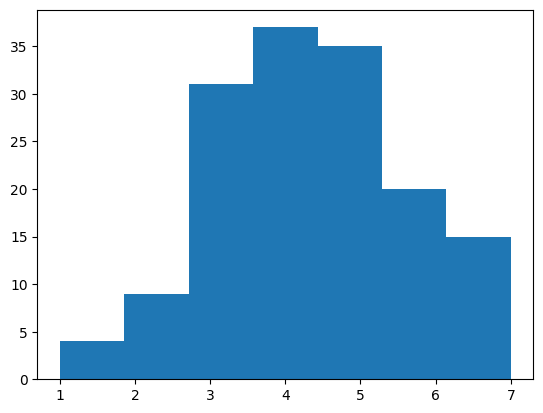

In [20]:
plt.hist(df['Fatigue_Severty'], bins=7)

**Below are the number of people whose fatigue score is greater than 36 which indicates significant fatigue**

In [21]:
(df['FSS_Score'] >= 36).sum()

97

<BarContainer object of 2 artists>

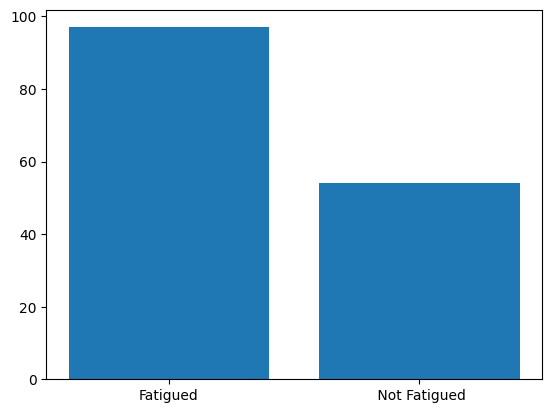

In [22]:
plt.bar(['Fatigued', ' Not Fatigued'] , [(df['FSS_Score'] >= 36).sum(),(df['FSS_Score'] < 36).sum()])

# Analysis of fatigue with respect to college year

In [23]:
df_1styr=df[df['year_of_study'] == '1st Year']
df_2ndyr = df[df['year_of_study'] == '2nd Year']
df_3rdyr = df[df['year_of_study'] == '3rd Year']
df_4thyr = df[df['year_of_study'] == '4th Year']

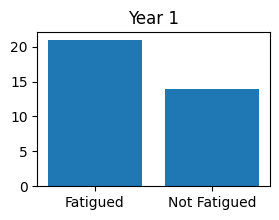

Daytime naps


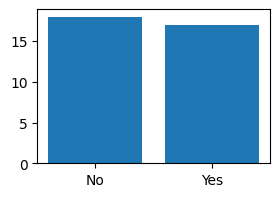

______________________________________________________________________________


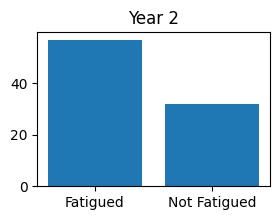

Daytime naps


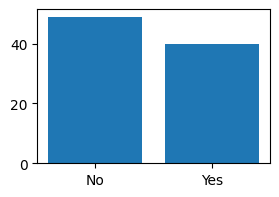

______________________________________________________________________________


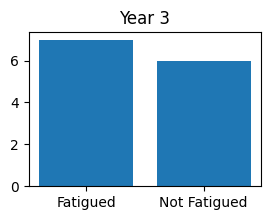

Daytime naps


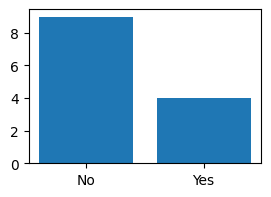

______________________________________________________________________________


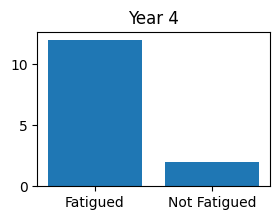

Daytime naps


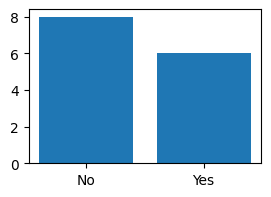

______________________________________________________________________________


In [24]:
df_list = [df_1styr, df_2ndyr, df_3rdyr, df_4thyr]
year = 1
for element in df_list:
    plt.figure(figsize=(3, 2))
    plt.bar(['Fatigued', 'Not Fatigued'], 
            [(element['FSS_Score'] >= 36).sum(), (element['FSS_Score'] < 36).sum()])
    title = f'Year {year}'
    plt.title(title)
    plt.show()
    
    print("Daytime naps")
    plt.figure(figsize=(3, 2))
    plt.bar(['No', 'Yes'], list(element['daytime_naps'].value_counts()))
    plt.show()
    
    year += 1
    print("______________________________________________________________________________")


# Data Processing for Univariate Analysis

**Dropping Categorical Columns**

In [25]:
df.columns

Index(['timestamp', 'year_of_study', 'gender', 'avg_sleep_hours',
       'sleep_schedule_consistency', 'daytime_naps', 'concentration_duration',
       'daily_study_hours', 'daily_caffeine_intake',
       'low_motivation_when_fatigued', 'exercise_causes_fatigue',
       'easily_fatigued', 'fatigue_interferes_physical_function',
       'fatigue_frequent_problems', 'fatigue_prevents_physical_function',
       'fatigue_interferes_duties', 'fatigue_top_disabling_symptom',
       'fatigue_interferes_life', 'email', 'FSS_Score', 'Fatigue_Severty'],
      dtype='object')

In [26]:
dropping_columns = ['timestamp', 'year_of_study', 'gender', 'email']
df = df.drop(dropping_columns , axis = 1)

In [27]:
df

,avg_sleep_hours,sleep_schedule_consistency,daytime_naps,concentration_duration,daily_study_hours,daily_caffeine_intake,low_motivation_when_fatigued,exercise_causes_fatigue,easily_fatigued,fatigue_interferes_physical_function,fatigue_frequent_problems,fatigue_prevents_physical_function,fatigue_interferes_duties,fatigue_top_disabling_symptom,fatigue_interferes_life,FSS_Score,Fatigue_Severty
0,5.5,5 times a week,Yes,60,2.0,1.0,4,5,2,5,1,1,4,3,3,28,3.111111
1,6.0,All days,Yes,45,3.0,3.0,7,1,5,1,2,2,2,2,6,28,3.111111
2,5.0,Once a week,No,30,1.0,0.0,7,3,4,6,6,5,6,4,5,46,5.111111
3,6.0,Twice a week,No,40,4.5,0.0,5,5,2,2,2,4,2,5,5,32,3.555556
4,6.0,All days,Yes,120,4.0,2.0,7,3,3,7,4,4,5,4,5,42,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,7.0,Thrice a week,Yes,30,4.0,3.0,4,6,7,5,4,4,6,4,5,45,5.000000
147,7.0,5 times a week,Yes,1,2.0,0.0,6,2,4,3,5,4,3,2,5,34,3.777778
148,8.0,All days,No,20,5.0,12.0,4,1,1,1,4,4,2,6,7,30,3.333333
149,7.0,5 times a week,Yes,50,8.0,3.0,4,6,5,7,6,4,7,1,6,46,5.111111


In [28]:
set(list(df['sleep_schedule_consistency']))

{'4 times a week',
 '5 times a week',
 '6 times a week',
 'All days',
 'Once a week',
 'Thrice a week',
 'Twice a week'}

**Sleep Schedule Consistency**

In [29]:
sleep_sched = {'4 times a week':4,
 '5 times a week':5,
 '6 times a week':6,
 'All days':7,
 'Once a week':1,
 'Thrice a week':3,
 'Twice a week':2}
Yes_no = {'Yes':1,'No':0 }

**Mapping values sleep schedule data to numbers**

In [30]:
df['sleep_schedule_consistency'] =df['sleep_schedule_consistency'].map(sleep_sched)

In [31]:
df['daytime_naps'] = df['daytime_naps'].map(Yes_no)

**Mapping daytime naps**

In [32]:
df

,avg_sleep_hours,sleep_schedule_consistency,daytime_naps,concentration_duration,daily_study_hours,daily_caffeine_intake,low_motivation_when_fatigued,exercise_causes_fatigue,easily_fatigued,fatigue_interferes_physical_function,fatigue_frequent_problems,fatigue_prevents_physical_function,fatigue_interferes_duties,fatigue_top_disabling_symptom,fatigue_interferes_life,FSS_Score,Fatigue_Severty
0,5.5,5,1,60,2.0,1.0,4,5,2,5,1,1,4,3,3,28,3.111111
1,6.0,7,1,45,3.0,3.0,7,1,5,1,2,2,2,2,6,28,3.111111
2,5.0,1,0,30,1.0,0.0,7,3,4,6,6,5,6,4,5,46,5.111111
3,6.0,2,0,40,4.5,0.0,5,5,2,2,2,4,2,5,5,32,3.555556
4,6.0,7,1,120,4.0,2.0,7,3,3,7,4,4,5,4,5,42,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,7.0,3,1,30,4.0,3.0,4,6,7,5,4,4,6,4,5,45,5.000000
147,7.0,5,1,1,2.0,0.0,6,2,4,3,5,4,3,2,5,34,3.777778
148,8.0,7,0,20,5.0,12.0,4,1,1,1,4,4,2,6,7,30,3.333333
149,7.0,5,1,50,8.0,3.0,4,6,5,7,6,4,7,1,6,46,5.111111


# Univariate Analysis

# Handling Outliers

In [33]:
df[df['avg_sleep_hours'] > 11.375]

,avg_sleep_hours,sleep_schedule_consistency,daytime_naps,concentration_duration,daily_study_hours,daily_caffeine_intake,low_motivation_when_fatigued,exercise_causes_fatigue,easily_fatigued,fatigue_interferes_physical_function,fatigue_frequent_problems,fatigue_prevents_physical_function,fatigue_interferes_duties,fatigue_top_disabling_symptom,fatigue_interferes_life,FSS_Score,Fatigue_Severty
6,15.0,7,1,15,0.5,0.0,1,3,4,3,3,2,2,2,1,21,2.333333
34,60.0,2,1,15,3.0,0.0,5,3,5,4,4,3,4,4,2,34,3.777778
38,12.0,7,0,120,0.0,1.0,1,1,1,7,3,3,7,1,1,25,2.777778
44,42.0,5,1,50,2.0,1.0,7,3,2,2,2,3,3,4,1,27,3.000000
75,49.0,7,0,90,2.0,0.0,4,4,4,4,4,4,4,4,4,36,4.000000
85,56.0,1,1,20,1.0,0.0,4,5,5,6,3,5,7,7,6,48,5.333333
101,69.0,2,1,5,5.0,0.0,1,2,2,5,3,3,2,3,2,23,2.555556
126,24.0,7,0,24,8.0,7.0,7,6,4,6,6,7,7,7,6,56,6.222222
135,12.0,7,1,5,1.0,0.0,7,3,3,4,4,4,4,4,4,37,4.111111
138,45.0,7,1,10,0.0,0.0,7,7,7,7,7,7,7,7,7,63,7.000000


Column: avg_sleep_hours
The upper bound of clipping is  11.375 number of elements clipped  11
The lower bound of clipping is  2.375  number of elements clipped  3
Mean: 6.7301324503311255
Median: 7.0
Mode: 7.0
Skewness: 0.5648890893690882


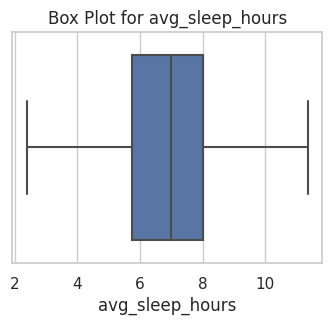

--------------------------------------------------------
Column: sleep_schedule_consistency
The upper bound of clipping is  13.0 number of elements clipped  0
The lower bound of clipping is  -3.0  number of elements clipped  0
Mean: 4.642384105960265
Median: 5.0
Mode: 7
Skewness: -0.33093295761396974


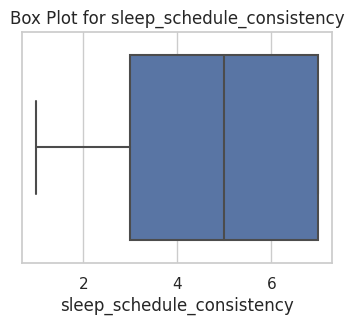

--------------------------------------------------------
Column: daytime_naps
The upper bound of clipping is  2.5 number of elements clipped  0
The lower bound of clipping is  -1.5  number of elements clipped  0
Mean: 0.5099337748344371
Median: 1.0
Mode: 1
Skewness: -0.039742943769952466


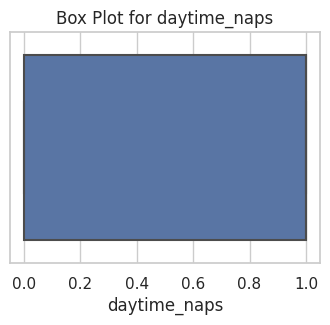

--------------------------------------------------------
Column: concentration_duration
The upper bound of clipping is  127.5 number of elements clipped  9
The lower bound of clipping is  -52.5  number of elements clipped  0
Mean: 41.98344370860927
Median: 30.0
Mode: 30.0
Skewness: 1.1143520235753819


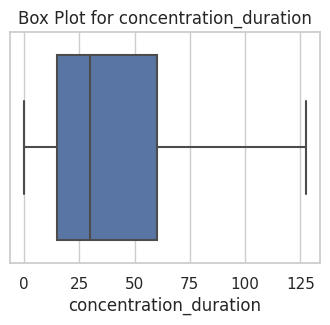

--------------------------------------------------------
Column: daily_study_hours
The upper bound of clipping is  7.375 number of elements clipped  17
The lower bound of clipping is  -1.625  number of elements clipped  0
Mean: 2.997516556291391
Median: 2.0
Mode: 2.0
Skewness: 0.7390523816245451


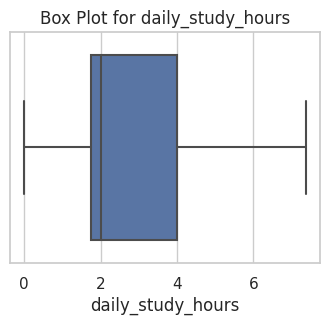

--------------------------------------------------------
Column: daily_caffeine_intake
The upper bound of clipping is  5.0 number of elements clipped  9
The lower bound of clipping is  -3.0  number of elements clipped  0
Mean: 1.3211920529801324
Median: 1.0
Mode: 0.0
Skewness: 1.1007728572732571


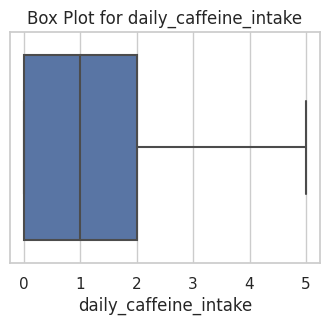

--------------------------------------------------------
Column: low_motivation_when_fatigued
The upper bound of clipping is  11.5 number of elements clipped  0
The lower bound of clipping is  -0.5  number of elements clipped  0
Mean: 5.033112582781457
Median: 5.0
Mode: 7
Skewness: -0.7506186332270809


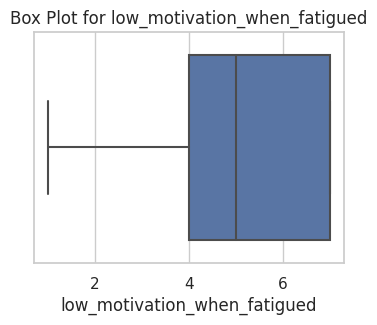

--------------------------------------------------------
Column: exercise_causes_fatigue
The upper bound of clipping is  9.5 number of elements clipped  0
The lower bound of clipping is  -2.5  number of elements clipped  0
Mean: 3.8410596026490067
Median: 4.0
Mode: 4
Skewness: 0.07702251799376984


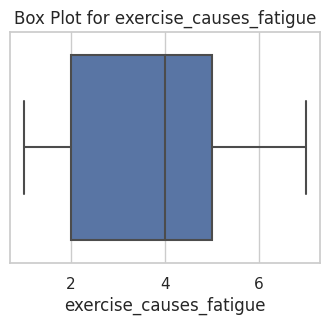

--------------------------------------------------------
Column: easily_fatigued
The upper bound of clipping is  8.75 number of elements clipped  0
The lower bound of clipping is  -1.25  number of elements clipped  0
Mean: 3.9403973509933774
Median: 4.0
Mode: 4
Skewness: 0.11998310214275171


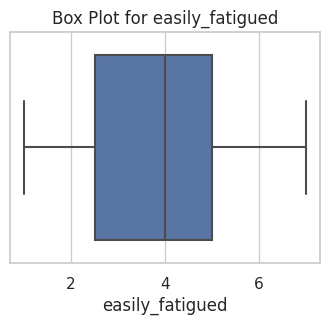

--------------------------------------------------------
Column: fatigue_interferes_physical_function
The upper bound of clipping is  9.75 number of elements clipped  0
The lower bound of clipping is  -0.25  number of elements clipped  0
Mean: 4.5364238410596025
Median: 5.0
Mode: 4
Skewness: -0.3963157867262164


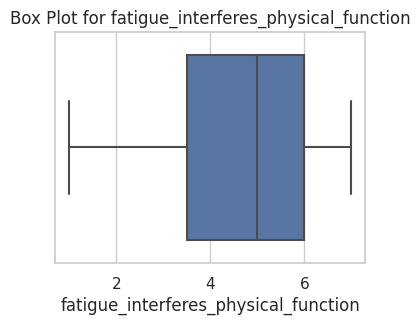

--------------------------------------------------------
Column: fatigue_frequent_problems
The upper bound of clipping is  10.5 number of elements clipped  0
The lower bound of clipping is  -1.5  number of elements clipped  0
Mean: 4.23841059602649
Median: 4.0
Mode: 4
Skewness: -0.08772745858066712


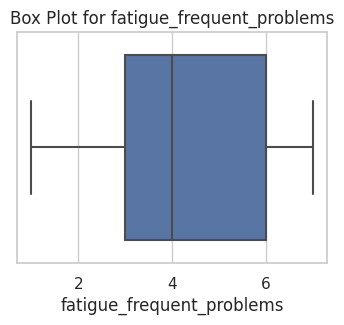

--------------------------------------------------------
Column: fatigue_prevents_physical_function
The upper bound of clipping is  10.5 number of elements clipped  0
The lower bound of clipping is  -1.5  number of elements clipped  0
Mean: 4.324503311258278
Median: 4.0
Mode: 4
Skewness: -0.19508592761130814


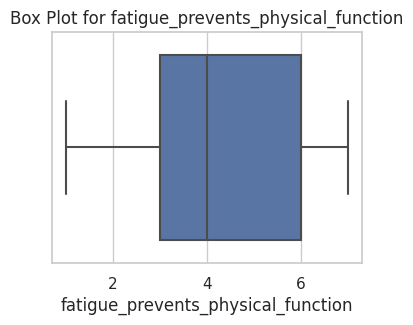

--------------------------------------------------------
Column: fatigue_interferes_duties
The upper bound of clipping is  9.0 number of elements clipped  0
The lower bound of clipping is  1.0  number of elements clipped  0
Mean: 4.655629139072848
Median: 5.0
Mode: 4
Skewness: -0.3565656649539885


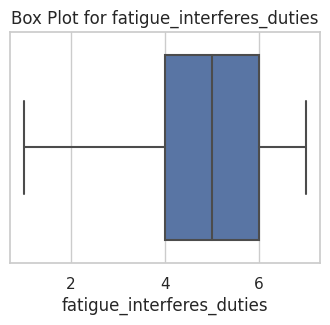

--------------------------------------------------------
Column: fatigue_top_disabling_symptom
The upper bound of clipping is  10.5 number of elements clipped  0
The lower bound of clipping is  -1.5  number of elements clipped  0
Mean: 4.291390728476821
Median: 4.0
Mode: 4
Skewness: -0.17794241334151897


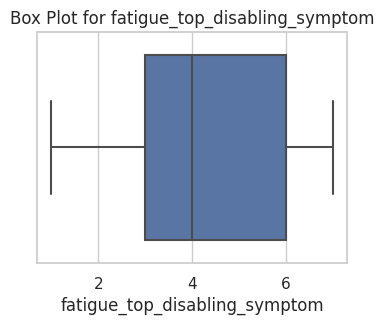

--------------------------------------------------------
Column: fatigue_interferes_life
The upper bound of clipping is  10.5 number of elements clipped  0
The lower bound of clipping is  -1.5  number of elements clipped  0
Mean: 4.344370860927152
Median: 4.0
Mode: 4
Skewness: -0.2372139397706255


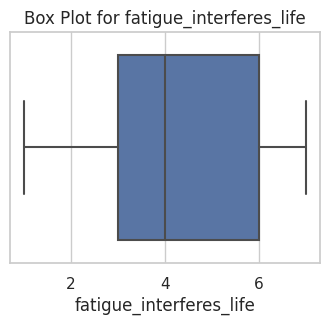

--------------------------------------------------------
Column: FSS_Score
The upper bound of clipping is  68.5 number of elements clipped  0
The lower bound of clipping is  8.5  number of elements clipped  0
Mean: 39.205298013245034
Median: 38.0
Mode: 36
Skewness: 0.02827696851504155


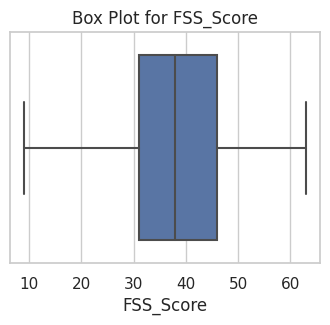

--------------------------------------------------------
Column: Fatigue_Severty
The upper bound of clipping is  7.61111111111111 number of elements clipped  0
The lower bound of clipping is  0.9444444444444455  number of elements clipped  0
Mean: 4.356144223693893
Median: 4.222222222222222
Mode: 4.0
Skewness: 0.028276968515040416


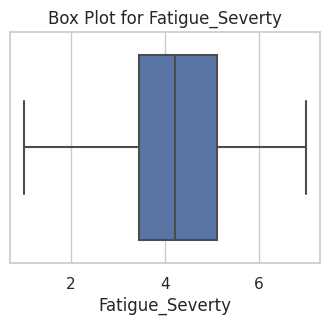

--------------------------------------------------------


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
sns.set(style="whitegrid")
for element in df.columns:
    Q1 = df[element].quantile(0.25) 
    Q3 = df[element].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Column:", element)
    print("The upper bound of clipping is ", upper_bound , "number of elements clipped " , len(df[df[element] > upper_bound]))
    print("The lower bound of clipping is ", lower_bound ," number of elements clipped ", len(df[df[element] < lower_bound]))
    df[element] = np.clip(df[element], lower_bound, upper_bound)
    print("Mean:", df[element].mean())
    print("Median:", df[element].median())
    print("Mode:", df[element].mode()[0])
    print("Skewness:", skew(df[element], axis=0, bias=True))
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[element])
    plt.title(f'Box Plot for {element}')
    plt.show()
    print("--------------------------------------------------------")
    
    


# Some Notable Analysis 
* Most people sleep arounf the 6hr mark but their are individual who sleep a lot more thus increasing the average hours slept

# Correlation matrix

In [35]:
import seaborn as sns

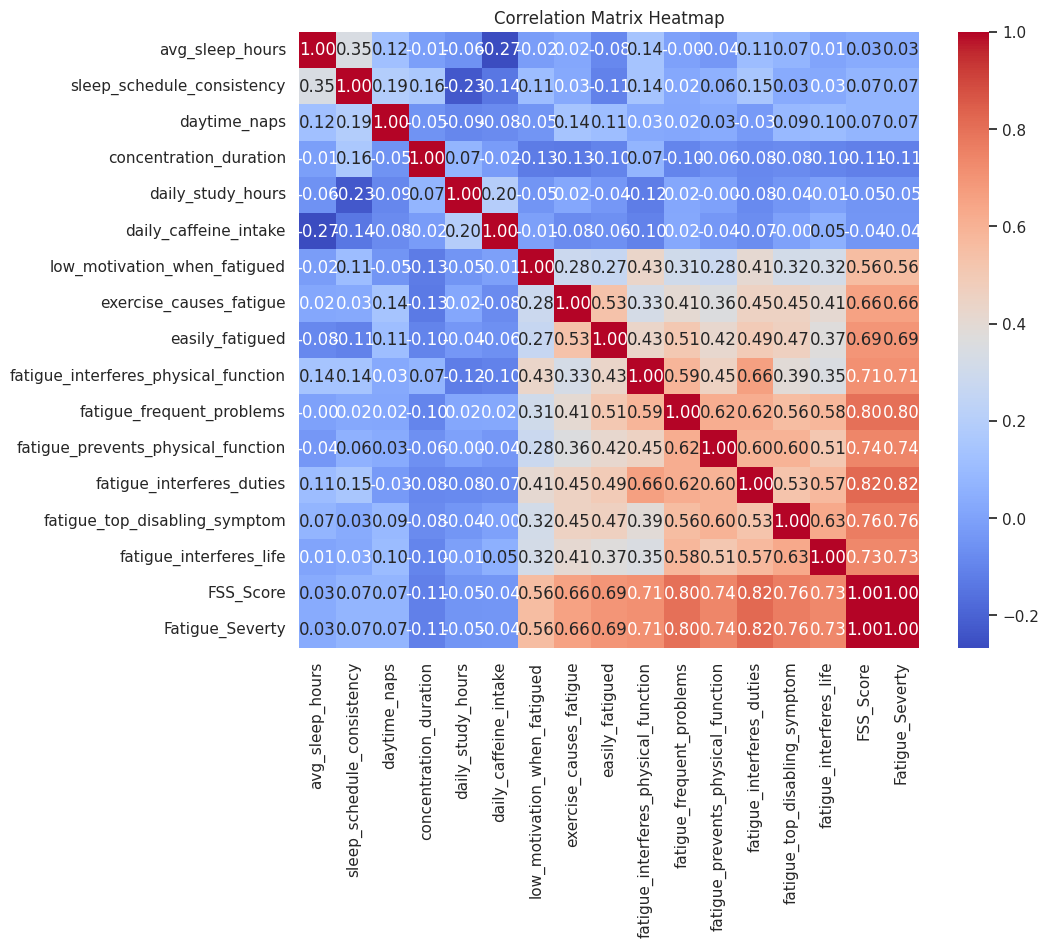

In [36]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


**What i wished to see in the correlation matrix was to see a strong negative correlation between average sleep hours and fatigue score but oh well**

In [37]:
df.columns

Index(['avg_sleep_hours', 'sleep_schedule_consistency', 'daytime_naps',
       'concentration_duration', 'daily_study_hours', 'daily_caffeine_intake',
       'low_motivation_when_fatigued', 'exercise_causes_fatigue',
       'easily_fatigued', 'fatigue_interferes_physical_function',
       'fatigue_frequent_problems', 'fatigue_prevents_physical_function',
       'fatigue_interferes_duties', 'fatigue_top_disabling_symptom',
       'fatigue_interferes_life', 'FSS_Score', 'Fatigue_Severty'],
      dtype='object')

# Testing

Students who sleep less than 6 hours in a day are generally fatigued
(Quantative Comparison)

In [38]:
less_than_6 = df[df['avg_sleep_hours'] < 6]

In [39]:
less_than_6

,avg_sleep_hours,sleep_schedule_consistency,daytime_naps,concentration_duration,daily_study_hours,daily_caffeine_intake,low_motivation_when_fatigued,exercise_causes_fatigue,easily_fatigued,fatigue_interferes_physical_function,fatigue_frequent_problems,fatigue_prevents_physical_function,fatigue_interferes_duties,fatigue_top_disabling_symptom,fatigue_interferes_life,FSS_Score,Fatigue_Severty
0,5.500,5,1,60.0,2.000,1.0,4,5,2,5,1,1,4,3,3,28,3.111111
2,5.000,1,0,30.0,1.000,0.0,7,3,4,6,6,5,6,4,5,46,5.111111
13,5.000,6,1,127.5,4.000,2.0,5,3,2,4,3,5,4,3,2,31,3.444444
15,5.000,2,0,30.0,6.000,1.0,2,4,3,2,2,2,4,1,1,21,2.333333
25,5.000,7,1,127.5,0.500,1.0,6,6,6,6,6,6,6,6,6,54,6.000000
26,5.000,4,1,127.5,6.000,1.0,5,5,5,6,5,6,4,5,6,47,5.222222
43,4.000,2,0,30.0,1.000,4.0,6,2,6,4,5,5,5,5,5,43,4.777778
45,5.000,4,1,0.0,3.000,2.0,4,6,7,3,2,4,5,4,4,39,4.333333
47,4.000,7,1,25.0,2.000,1.0,6,5,3,1,1,1,2,2,2,23,2.555556
48,4.000,1,0,10.0,0.000,4.0,5,5,5,5,5,5,5,5,5,45,5.000000


In [40]:
len(less_than_6)

38

people who are tired and sleep less than 6hrs 13 and people who sleep less than 6hr

In [41]:
(less_than_6['FSS_Score']>=36).sum()

24

Proportion number of tired people who sleep less than 6hrs/ number of people with less than 6hr sleep

In [42]:
((less_than_6['FSS_Score']>=36).sum())/len(less_than_6)

0.631578947368421

In [43]:
more_than_6 = df[df['avg_sleep_hours'] >= 6]

In [44]:
((more_than_6['FSS_Score']>=36).sum())/len(more_than_6)

0.6460176991150443

# 63.15% of the People who sleep less than 6hr feel tired whearas 64.6% of the people who sleep more than or = 6hr feel tired in our data

In [45]:
from scipy.stats import ttest_ind
group_less_than_6hr = df[df["avg_sleep_hours"] < 6]["FSS_Score"]
group_6hr_or_more = df[df["avg_sleep_hours"] >= 6]["FSS_Score"]
t_stat, p_value = ttest_ind(group_less_than_6hr, group_6hr_or_more)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.1:
    print("There is a significant difference in tiredness (FSS score) between people who sleep less than 6 hours and those who sleep 6 or more hours.")
else:
    print("There is no significant difference in tiredness (FSS score) between people who sleep less than 6 hours and those who sleep 6 or more hours.")


T-statistic: -1.354
P-value: 0.178
There is no significant difference in tiredness (FSS score) between people who sleep less than 6 hours and those who sleep 6 or more hours.


In [46]:
from scipy.stats import ttest_ind
group_less_than_5hr = df[df["avg_sleep_hours"] < 5]["FSS_Score"]
group_5hr_or_more = df[df["avg_sleep_hours"] >= 5]["FSS_Score"]
t_stat, p_value = ttest_ind(group_less_than_5hr, group_5hr_or_more)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.1:
    print("There is a significant difference in tiredness (FSS score) between people who sleep less than 5 hours and those who sleep 6 or more hours.")
else:
    print("There is no significant difference in tiredness (FSS score) between people who sleep less than 5 hours and those who sleep 6 or more hours.")


T-statistic: -1.723
P-value: 0.087
There is a significant difference in tiredness (FSS score) between people who sleep less than 5 hours and those who sleep 6 or more hours.


# If you liked the analysis upvote !!